In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 100

In [85]:
def rename_columns(df, dictionary_oldname_newname):
    print(str(dictionary_oldname_newname))
    df.rename(columns=dictionary_oldname_newname, inplace=True )
    return True

def drop_columns(df, list_column_names) :

    df.drop(columns=list_column_names, axis=1, inplace=True)
    return True

def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return True

def lower_case_text_fields(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: str(x).lower())
    return True

In [86]:
file1 = pd.read_csv('Data/file1.csv')
list(file1.columns)

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [87]:
file2 = pd.read_csv('Data/file2.csv')
list(file2.columns)

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Total Claim Amount',
 'Policy Type',
 'Vehicle Class']

In [88]:
file2 = file2[file1.columns]

In [89]:
file3 = pd.read_csv('Data/file3.csv')
print(list(file3.columns))

['Customer', 'State', 'Customer Lifetime Value', 'Education', 'Gender', 'Income', 'Monthly Premium Auto', 'Number of Open Complaints', 'Policy Type', 'Total Claim Amount', 'Vehicle Class']


In [90]:
file3 = pd.read_csv('Data/file3.csv')
rename_columns(file3, {'State': 'ST', 'Gender' : 'GENDER'})
file3 = file3[file1.columns]


{'State': 'ST', 'Gender': 'GENDER'}


In [91]:
file3.head()


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,SA25987,Washington,M,High School or Below,3479.137523,0,104,0,Personal Auto,Two-Door Car,499.200000
1,TB86706,Arizona,M,Master,2502.637401,0,66,0,Personal Auto,Two-Door Car,3.468912
2,ZL73902,Nevada,F,Bachelor,3265.156348,25820,82,0,Personal Auto,Four-Door Car,393.600000
3,KX23516,California,F,High School or Below,4455.843406,0,121,0,Personal Auto,SUV,699.615192
4,FN77294,California,M,High School or Below,7704.958480,30366,101,2,Personal Auto,SUV,484.800000


In [92]:
file4 = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')
list(file4.columns)

['row',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [93]:
file4.head()
#replaced the empty clumnhead with "row" . Don't ask why row

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [94]:
file4.drop(columns=['row'], axis=1, inplace=True)

In [95]:

concoction = pd.concat([file1,file2,file3], axis=0)
concoction.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [96]:
file4.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [97]:
drop_columns(file4,['Coverage', 'Effective To Date', 'EmploymentStatus',  'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception','Number of Policies', 'Policy','Renew Offer Type','Sales Channel', 'Vehicle Size','Vehicle Type'])

True

In [98]:
rename_columns(file4, {'State': 'ST', 'Gender' : 'GENDER'})

{'State': 'ST', 'Gender': 'GENDER'}


True

In [99]:
# we shouldn't use file 4 yet
#pd.concat([concoction,file4], axis=0)

In [100]:
concoction.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [101]:
concoction[(concoction['GENDER'] != "M") & (concoction['GENDER'] != "F")].GENDER.value_counts()


Male      40
female    30
Femal     17
Name: GENDER, dtype: int64

In [102]:
concoction.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [103]:
lower_case_column_names(concoction)

True

In [104]:
concoction.loc[concoction['gender'] == "Male", "gender"]="M"
concoction.loc[concoction['gender'] == "female", "gender"]="F"
concoction.loc[concoction['gender'] == "Femal", "gender"]="F"

In [105]:
concoction[(concoction['gender'] != "M") & (concoction['gender'] != "F")].gender.value_counts()

Series([], Name: gender, dtype: int64)

In [106]:

concoction.loc[concoction['education'] == "Bachelors", "education"]="Bachelor"

In [107]:
concoction['education'] .value_counts()

Bachelor                2743
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Name: education, dtype: int64

In [108]:
concoction['st'] .value_counts()


California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [109]:
concoction.loc[concoction['st'] == "AZ", "st"]="Arizona"

In [110]:
concoction.loc[concoction['st'] == "WA", "st"]="Washington"

In [111]:
concoction.loc[concoction['st'] == "Cali", "st"]="California"

In [112]:
concoction['st'] .value_counts() == 0

California    False
Oregon        False
Arizona       False
Nevada        False
Washington    False
Name: st, dtype: bool

In [113]:
rename_columns(concoction,{"st":"state"})

{'st': 'state'}


True

In [114]:
concoction.head() 

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [115]:
concoction['policy type'] .value_counts()

Personal Auto     6792
Corporate Auto    1965
Special Auto       380
Name: policy type, dtype: int64

In [116]:
concoction['vehicle class'] .value_counts()

Four-Door Car    4641
Two-Door Car     1896
SUV              1774
Sports Car        483
Luxury SUV        182
Luxury Car        161
Name: vehicle class, dtype: int64

In [117]:
concoction.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [118]:
concoction[concoction['number of open complaints'] .value_counts()]

KeyError: "None of [Int64Index([5629, 1626, 765, 283, 247, 230, 119, 93, 60, 44, 29, 12], dtype='int64')] are in the [columns]"

In [119]:
concoction["state"].isnull().values.sum()


2937

In [120]:
concoction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   state                      9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   education                  9137 non-null   object 
 4   customer lifetime value    9130 non-null   object 
 5   income                     9137 non-null   float64
 6   monthly premium auto       9137 non-null   float64
 7   number of open complaints  9137 non-null   object 
 8   policy type                9137 non-null   object 
 9   vehicle class              9137 non-null   object 
 10  total claim amount         9137 non-null   float64
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [121]:
concoction['state'].value_counts(dropna=False)

California    3152
NaN           2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

In [122]:
concoction.loc[concoction['customer'].isnull()]

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
concoction.drop(concoction.loc[concoction['customer'].isnull()].index, inplace=True)

In [124]:
concoction.loc[concoction['state'].isnull()]

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount


In [125]:
concoction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   6200 non-null   object 
 1   state                      6200 non-null   object 
 2   gender                     6078 non-null   object 
 3   education                  6200 non-null   object 
 4   customer lifetime value    6193 non-null   object 
 5   income                     6200 non-null   float64
 6   monthly premium auto       6200 non-null   float64
 7   number of open complaints  6200 non-null   object 
 8   policy type                6200 non-null   object 
 9   vehicle class              6200 non-null   object 
 10  total claim amount         6200 non-null   float64
dtypes: float64(3), object(8)
memory usage: 581.2+ KB


In [126]:
concoction.drop(labels=["customer",],axis=1)

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [127]:
concoction.drop_duplicates()

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [128]:
# 1. delete percent sign
concoction['customer lifetime value'] = concoction['customer lifetime value'].apply(lambda x: str(x).split(".")[0])

In [129]:
# 2. convert to numeric
concoction['customer lifetime value'] =  pd.to_numeric(concoction['customer lifetime value'], errors='coerce')

In [130]:
concoction.head()

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [131]:
concoction.drop(concoction.loc[concoction['customer lifetime value'].isnull()].index, inplace=True)

In [132]:
concoction.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [133]:
concoction.mean()

C:\Users\Eupho\AppData\Local\Temp/ipykernel_7044/3666452946.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  concoction.mean()


customer lifetime value    264288.957760
income                      38053.027027
monthly premium auto          118.297783
total claim amount            424.910575
dtype: float64

In [134]:
concoction.mean()[1]

C:\Users\Eupho\AppData\Local\Temp/ipykernel_7044/3704236072.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  concoction.mean()[1]


38053.02702702703

In [135]:
concoction.loc[concoction['total claim amount'].isnull()]

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount


In [136]:
concoction['customer lifetime value'].value_counts(dropna=False)

2396.0      6
3230.0      6
5838.0      6
5926.0      6
3508.0      6
           ..
599442.0    1
285952.0    1
609846.0    1
556129.0    1
7524.0      1
Name: customer lifetime value, Length: 5052, dtype: int64

In [137]:
concoction['income'].value_counts(dropna=False)

0.0        1520
95697.0       7
10621.0       7
14290.0       6
61108.0       6
           ... 
51622.0       1
15616.0       1
22699.0       1
81713.0       1
21941.0       1
Name: income, Length: 3964, dtype: int64

In [138]:
print(str(concoction.mean()[1]))
mean_income = concoction.loc[concoction['income'] != 0.0, "income"].mean()
print(str(mean_income))

38053.02702702703
50467.83730414252


C:\Users\Eupho\AppData\Local\Temp/ipykernel_7044/4011633433.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(str(concoction.mean()[1]))


In [139]:
concoction.loc[concoction['income'] == 0.0, "income"]=mean_income

In [140]:
concoction['number of open complaints'].value_counts(dropna=False)

0         3318
1/0/00    1615
1          423
1/1/00     245
2          160
3          133
1/2/00      93
4           68
1/3/00      59
1/4/00      29
5           24
1/5/00      12
Name: number of open complaints, dtype: int64

In [141]:
# replace stuff

concoction.loc[concoction['number of open complaints'] == "0", "number of open complaints"]="0/0"
concoction.loc[concoction['number of open complaints'] == "1", "number of open complaints"]="0/1"
concoction.loc[concoction['number of open complaints'] == "2", "number of open complaints"]="0/2"
concoction.loc[concoction['number of open complaints'] == "3", "number of open complaints"]="0/3"
concoction.loc[concoction['number of open complaints'] == "4", "number of open complaints"]="0/4"
concoction.loc[concoction['number of open complaints'] == "5", "number of open complaints"]="0/5"

concoction.loc[concoction['number of open complaints'] == 0, "number of open complaints"]="0/0"
concoction.loc[concoction['number of open complaints'] == 1, "number of open complaints"]="0/1"
concoction.loc[concoction['number of open complaints'] == 2, "number of open complaints"]="0/2"
concoction.loc[concoction['number of open complaints'] == 3, "number of open complaints"]="0/3"
concoction.loc[concoction['number of open complaints'] == 4, "number of open complaints"]="0/4"
concoction.loc[concoction['number of open complaints'] == 5, "number of open complaints"]="0/5"

In [142]:
concoction['number of open complaints'].value_counts(dropna=False)

0/0       3318
1/0/00    1615
0/1        423
1/1/00     245
0/2        160
0/3        133
1/2/00      93
0/4         68
1/3/00      59
1/4/00      29
0/5         24
1/5/00      12
Name: number of open complaints, dtype: int64

In [143]:
concoction['number of open complaints'] = concoction['number of open complaints'].apply(lambda x: str(x).split("/")[1])

In [144]:
concoction['number of open complaints'].value_counts(dropna=False)


0    4933
1     668
2     253
3     192
4      97
5      36
Name: number of open complaints, dtype: int64

In [145]:
concoction['number of open complaints'] =  pd.to_numeric(concoction['number of open complaints'], errors='coerce')

In [146]:
concoction.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints      int64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [147]:
concoction.loc[concoction['state'] == "Arizona", "state"]="Central"
concoction.loc[concoction['state'] == "Nevada", "state"]="Central"

In [148]:
concoction.loc[concoction['state'] == "California", "state"]="West"

In [149]:
concoction.loc[concoction['state'] == "Oregon", "state"]="North West"

In [150]:
concoction.loc[concoction['state'] == "Washington", "state"]="East"

In [151]:
#change state to category
concoction["state"].astype("category")


1          Central
2          Central
3             West
4             East
5       North West
           ...    
7065          West
7066          West
7067          West
7068          West
7069          West
Name: state, Length: 6179, dtype: category
Categories (4, object): ['Central', 'East', 'North West', 'West']

In [152]:
concoction.head()

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1,QZ44356,Central,F,Bachelor,697953.0,50467.837304,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Central,F,Bachelor,1288743.0,48767.000000,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,West,M,Bachelor,764586.0,50467.837304,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,East,M,High School or Below,536307.0,36357.000000,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,North West,F,Bachelor,825629.0,62902.000000,69.0,0,Personal Auto,Two-Door Car,159.383042


In [153]:
concoction["gender"].astype("category")
concoction["education"].astype("category")
concoction["policy type"].astype("category")
concoction["vehicle class"].astype("category")


1       Four-Door Car
2        Two-Door Car
3                 SUV
4       Four-Door Car
5        Two-Door Car
            ...      
7065    Four-Door Car
7066    Four-Door Car
7067    Four-Door Car
7068    Four-Door Car
7069     Two-Door Car
Name: vehicle class, Length: 6179, dtype: category
Categories (6, object): ['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car', 'Two-Door Car']

In [154]:
lower_case_text_fields(concoction, "gender")
lower_case_text_fields(concoction, "education")
lower_case_text_fields(concoction, "policy type")
lower_case_text_fields(concoction, "vehicle class")

# state is now of type category, so not a string and the uppercase stays


True

In [155]:
concoction["gender"].astype("category")
concoction["education"].astype("category")
concoction["policy type"].astype("category")
concoction["vehicle class"].astype("category")

1       four-door car
2        two-door car
3                 suv
4       four-door car
5        two-door car
            ...      
7065    four-door car
7066    four-door car
7067    four-door car
7068    four-door car
7069     two-door car
Name: vehicle class, Length: 6179, dtype: category
Categories (6, object): ['four-door car', 'luxury car', 'luxury suv', 'sports car', 'suv', 'two-door car']

In [156]:
concoction.dtypes


customer                      object
state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints      int64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [157]:
# all objects are categorical, the rest numerical


In [158]:
# THERE IS NO DATE IN THE SOURCE DATA
# I use the "cleaned" dataset with the additional fields

file4 = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')
print(str(file4.head()))
list(file4.dtypes)

   row Customer       State  Customer Lifetime Value Response  Coverage  \
0    0  DK49336     Arizona              4809.216960       No     Basic   
1    1  KX64629  California              2228.525238       No     Basic   
2    2  LZ68649  Washington             14947.917300       No     Basic   
3    3  XL78013      Oregon             22332.439460      Yes  Extended   
4    4  QA50777      Oregon              9025.067525       No   Premium   

  Education Effective To Date EmploymentStatus Gender  ...  \
0   College           2/18/11         Employed      M  ...   
1   College           1/18/11       Unemployed      F  ...   
2  Bachelor           2/10/11         Employed      M  ...   
3   College           1/11/11         Employed      M  ...   
4  Bachelor           1/17/11    Medical Leave      F  ...   

   Number of Open Complaints Number of Policies     Policy Type        Policy  \
0                        0.0                  9  Corporate Auto  Corporate L3   
1             

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

In [159]:
file4.head()

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [160]:
#file4["Effective To Date"].astype('datetime64[n]')'

file4["month"] = pd.to_datetime(file4["Effective To Date"], infer_datetime_format=True).dt.month

In [161]:
file4.head()

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [162]:
file4[(file4['month'] >=1) & (file4['month'] <4)]

,row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [163]:
#4
# prepared clean dataset

cleaned_by_nelson =  pd.read_csv('data/Data_Marketing_Customer_Analysis_Round3.csv')

In [164]:
# Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
# (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [169]:
cleaned_by_nelson.head()

,oldindex,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [170]:
cleaned_by_nelson.dtypes

oldindex                          int64
region                           object
customer_lifetime_value           int64
response                         object
coverage                         object
education                        object
effective_to_date                object
month                            object
employment_status                object
gender                           object
income                            int64
location_code                    object
marital_status                   object
monthly_premium_auto              int64
months_since_last_claim           int64
months_since_policy_inception     int64
number_of_open_complaints         int64
number_of_policies                int64
policy_type                      object
policy                           object
renew_offer_type                 object
sales_channel                    object
total_claim_amount                int64
vehicle_class                    object
vehicle_size                     object


In [171]:
cleaned_by_nelson.select_dtypes(np.number)

,oldindex,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [175]:
cleaned_by_nelson.drop(labels=["oldindex",],axis=1)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [179]:
nelsons_numbers = cleaned_by_nelson.select_dtypes(np.number)

In [180]:
nelsons_categories = cleaned_by_nelson.select_dtypes(object)

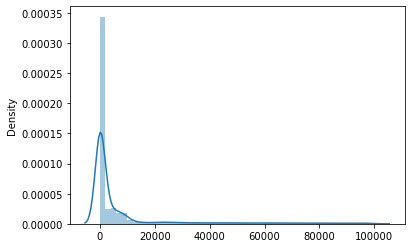

In [185]:
for column in nelsons_numbers.columns()
sns.distplot(nelsons_numbers);

In [186]:
nelsons_numbers.columns()


TypeError: 'Index' object is not callable